# Auto ML com PyCaret

<img src="https://i.imgur.com/dHpHXZD.png" />

<img src="https://i.imgur.com/mgiEV8X.png" />

## Nesse projeto vamos fazer um desafio do Kaggle utilizando a biblioteca do PyCaret

# Detecção de fraude de cartão de crédito

### Transações anônimas de cartão de crédito rotuladas como fraudulentas ou genuínas

**Contexto**
É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

**Conteúdo**
Os conjuntos de dados contêm transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta as transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Os recursos V1, V2,… V28 são os componentes principais obtidos com o PCA, os únicos recursos que não foram transformados com o PCA são 'Tempo' e 'Quantidade'. O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o Amount da transação, esse recurso pode ser usado por exemplo, aprendizado dependente de custos. O recurso 'Classe' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.

desafio: https://www.kaggle.com/mlg-ulb/creditcardfraud

créditos: https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763

créditos: https://medium.com/data-hackers/automl-uma-nova-abordagem-de-machine-learning-87a40d866dc1

In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 999)

In [4]:
%time data = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Auto_ML/creditcard.csv', sep = ',', encoding  = 'ISO-8859-1')

Wall time: 2.38 s


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*ok, não temos dados nulos*

**Verificando a target:**

In [8]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

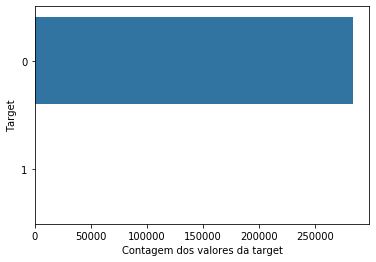

In [10]:
sns.countplot(y=data.Class ,data=data)
plt.xlabel("Contagem dos valores da target")
plt.ylabel("Target")
plt.show()

*Temos uma Target totalmente desbalanceada isso dificutaria a separação do dados de treino e teste e quebra qualquer modelo de ML, mas como o objetivo é verificar a capacidade do pycaret de ajustar os dados para os modelos preditivos.*

*Não iremos ajustar nenhum dado*

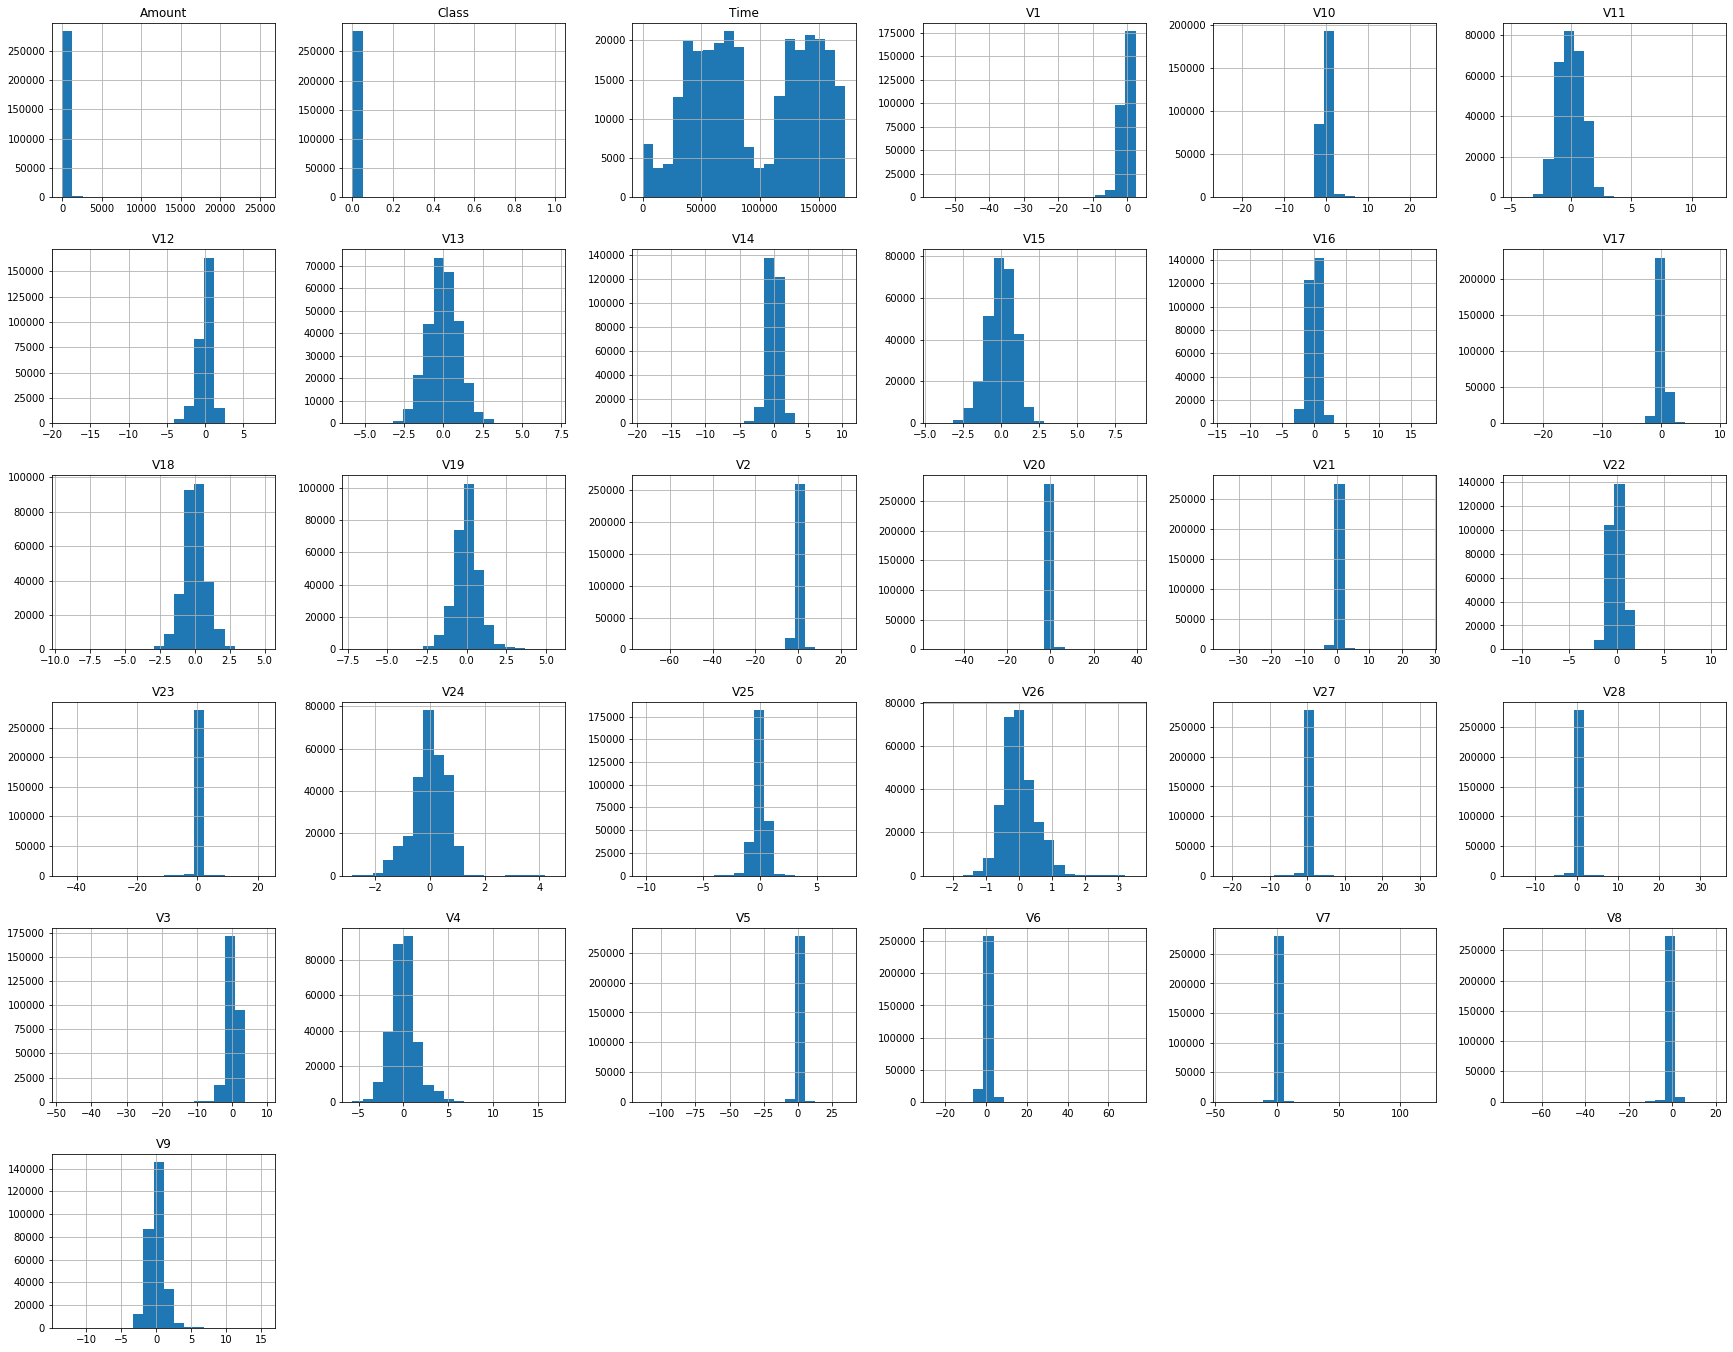

In [15]:
data.hist(figsize=(30,24),bins = 20)
plt.title("Distribuição das variáveis")
plt.show()

Observe também a distribuição nas variáveis.

## Import do módulo de classificação do PyCaret e setup do projeto

Vamos direto para o PyCaret:

In [19]:
from pycaret.classification import *
clf1 = setup(data = data, target = 'Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7747
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


*Note que na coluna Value temos todos os tratamento ou ajustes necessarios.* 

*Note onde **False** seria necessário, onde **None** não precisaria*

documentação do setup: https://pycaret.org/setup/

**Como nosso objetivo e verificar a capacidade do PyCaret prossegu4ir sem fazer nenhum ajuste nos dados.**

## Comparação entre os modelos

*Agora vamos aplicar todos os modelos classificatorios em nosso Dataset*

In [24]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.999600,0.983500,0.802300,0.934200,0.861200,0.861000
1,CatBoost Classifier,0.999600,0.981900,0.793700,0.962500,0.867000,0.866700
2,Random Forest Classifier,0.999500,0.927000,0.753300,0.949700,0.836200,0.836000
3,Extra Trees Classifier,0.999500,0.953200,0.776500,0.941100,0.848500,0.848300
4,Linear Discriminant Analysis,0.999400,0.981000,0.755900,0.892800,0.814700,0.814400
5,Ada Boost Classifier,0.999300,0.974800,0.720800,0.848100,0.775800,0.775400
6,Decision Tree Classifier,0.999200,0.885000,0.770300,0.771700,0.767600,0.767200
7,Logistic Regression,0.999000,0.918600,0.692400,0.719100,0.701200,0.700700
8,Gradient Boosting Classifier,0.999000,0.728000,0.583100,0.806400,0.661400,0.661000
9,Ridge Classifier,0.998900,0.000000,0.430400,0.877100,0.572600,0.572200


*Temos aqui todos os modelos classificatores e ainda temos distacados os melhores parametros*

## Execução de um modelo específico

*podemos também executar um único modelo classificatorio nesse exemplo vamos usar o XGboost*

In [25]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9995,0.9855,0.7714,0.9643,0.8571,0.8569
1,0.9996,0.9741,0.7714,1.0000,0.8710,0.8708
2,0.9995,0.9971,0.8000,0.9333,0.8615,0.8613
3,0.9997,0.9858,0.8857,0.9394,0.9118,0.9116
4,0.9996,0.9933,0.8529,0.9355,0.8923,0.8921
5,0.9993,0.9350,0.6765,0.9200,0.7797,0.7793
6,0.9994,0.9891,0.7353,0.8929,0.8065,0.8062
7,0.9996,0.9989,0.9118,0.8857,0.8986,0.8984
8,0.9997,0.9981,0.8235,1.0000,0.9032,0.9031
9,0.9994,0.9781,0.7941,0.8710,0.8308,0.8305


### Parâmetros do modelo xgboost

In [26]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=7747,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

### Cross validation

In [27]:
model=tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9995,0.9676,0.7143,1.0000,0.8333,0.8331
1,0.9996,0.9583,0.7714,1.0000,0.8710,0.8708
2,0.9995,0.9987,0.8000,0.9333,0.8615,0.8613
3,0.9996,0.9839,0.8571,0.9375,0.8955,0.8953
4,0.9996,0.9917,0.8529,0.9355,0.8923,0.8921
5,0.9993,0.9523,0.6471,0.9565,0.7719,0.7716
6,0.9994,0.9816,0.7353,0.8929,0.8065,0.8062
7,0.9998,0.9972,0.9118,0.9688,0.9394,0.9393
8,0.9997,0.9986,0.8529,1.0000,0.9206,0.9205
9,0.9996,0.9689,0.8235,0.9333,0.8750,0.8748


# Conclusão:

*As ferramentas de Auto ML como o PyCaret veio para facilitar a vida de quem trabalha com ciência de dados, mas tem um custo e esse custo é computacional para esse data set foram horas de processamento.*